In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('airbnb_bologna_0310_2016-02-07.csv')

In [15]:
df.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,7033000,310,36863433,Private room,Italy,Bologna,NaN,Porto - Saragozza,17,5.0,2.0,1.0,1.0,43.0,1.0,NaN,2016-02-07 07:21:25.446075,44.499367,11.334322,0101000020E6100000A8AAD0402CAB2640CFD90242EB3F...
1,4189367,310,21733407,Entire home/apt,Italy,Bologna,NaN,Santo Stefano,92,4.5,5.0,0.0,1.0,79.0,1.0,NaN,2016-02-07 07:21:16.651330,44.496593,11.351125,0101000020E6100000B29DEFA7C6B326401536035C903F...
2,5604845,310,29055883,Entire home/apt,Italy,Bologna,NaN,Santo Stefano,35,5.0,5.0,3.0,2.0,138.0,3.0,NaN,2016-02-07 07:21:14.233623,44.497579,11.344140,0101000020E6100000AA7D3A1E33B0264094162EABB03F...
3,7034054,310,36876763,Entire home/apt,Italy,Bologna,NaN,Porto - Saragozza,35,5.0,4.0,2.0,1.0,75.0,1.0,NaN,2016-02-07 07:21:00.889529,44.498435,11.335240,0101000020E6100000419FC893A4AB26404417D4B7CC3F...
4,7833460,310,7353681,Private room,Italy,Bologna,NaN,Navile,3,5.0,2.0,1.0,1.0,43.0,1.0,NaN,2016-02-07 07:20:44.900212,44.530246,11.354510,0101000020E6100000BD35B05582B52640DB6AD619DF43...


In [16]:
df.describe()

,room_id,survey_id,host_id,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,latitude,longitude
count,7.360000e+02,736.0,7.360000e+02,0.0,736.000000,614.000000,710.000000,735.000000,708.000000,736.000000,706.000000,0.0,736.000000,736.000000
mean,6.031258e+06,310.0,2.296141e+07,NaN,22.902174,4.672638,2.629577,1.084354,1.105932,65.985054,1.621813,NaN,44.497116,11.344004
std,3.296332e+06,0.0,1.682923e+07,NaN,33.926871,0.395118,1.007433,0.528184,0.392747,41.337878,0.970504,NaN,0.010923,0.018454
min,2.423400e+04,310.0,4.438400e+04,NaN,0.000000,2.500000,1.000000,0.000000,0.000000,11.000000,1.000000,NaN,44.436875,11.267486
25%,3.200490e+06,310.0,7.503471e+06,NaN,2.000000,4.500000,2.000000,1.000000,1.000000,40.000000,1.000000,NaN,44.491652,11.336147
50%,6.360798e+06,310.0,2.171402e+07,NaN,9.000000,4.500000,2.000000,1.000000,1.000000,58.000000,1.000000,NaN,44.496077,11.344226
75%,8.865390e+06,310.0,3.606355e+07,NaN,31.000000,5.000000,3.000000,1.000000,1.000000,80.000000,2.000000,NaN,44.500874,11.352154
max,1.109926e+07,310.0,5.762606e+07,NaN,259.000000,5.000000,5.000000,6.000000,7.000000,749.000000,15.000000,NaN,44.548173,11.398927


In [17]:
df.isnull().sum()

room_id                   0
survey_id                 0
host_id                   0
room_type                 0
country                   0
city                      0
borough                 736
neighborhood              0
reviews                   0
overall_satisfaction    122
accommodates             26
bedrooms                  1
bathrooms                28
price                     0
minstay                  30
name                    736
last_modified             0
latitude                  0
longitude                 0
location                  0
dtype: int64

Some of the attributes are irrelevant such as: room_id, survey_id, host_id, name, last_modified, latitude, longitude and location,
    and country, city, and borought are also unnecessary since we are examining one city. 

We also need to eliminate the attributes which have a lot of null values so that when we drop the cells containing NAN values, we do not lose many data.

In [18]:
df.drop(['room_id', 'survey_id', 'host_id', 'country', 'city',  'borough', 'name', 'last_modified', 'latitude', 'longitude', 'location'], axis=1, inplace=True)

In [19]:
df['overall_satisfaction'].fillna(df['overall_satisfaction'].mode()[0], inplace=True)
df['accommodates'].fillna(df['accommodates'].mode()[0], inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mode()[0], inplace=True)
df['minstay'].fillna(df['minstay'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

room_type               0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
minstay                 0
dtype: int64

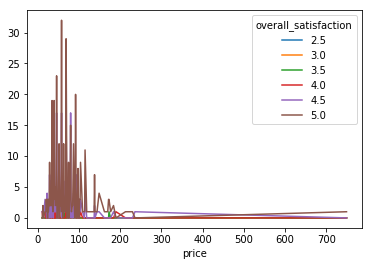

In [21]:
freq3 = pd.crosstab(index=[df['price']], columns=df['overall_satisfaction'])
freq3.plot()

In [22]:
df.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,22.902174,4.726902,2.607337,1.084239,1.101902,65.985054,1.596467
std,33.926871,0.380846,0.996265,0.527834,0.385727,41.337878,0.958422
min,0.000000,2.500000,1.000000,0.000000,0.000000,11.000000,1.000000
25%,2.000000,4.500000,2.000000,1.000000,1.000000,40.000000,1.000000
50%,9.000000,5.000000,2.000000,1.000000,1.000000,58.000000,1.000000
75%,31.000000,5.000000,3.000000,1.000000,1.000000,80.000000,2.000000
max,259.000000,5.000000,5.000000,6.000000,7.000000,749.000000,15.000000


In [23]:
df['price'].describe()

count    736.000000
mean      65.985054
std       41.337878
min       11.000000
25%       40.000000
50%       58.000000
75%       80.000000
max      749.000000
Name: price, dtype: float64

The main attributes that we are focusing are price and overall satisfaction so we are going to group them to crate classes.

In [24]:
def change_price(price):
    if price < 25:
        return 'a. 0-25'
    elif price < 50:
        return 'b. 26-50'
    elif price < 75:
        return 'c. 51-75'
    elif price < 100:
        return 'd. 76-100'
    elif price < 150:
        return 'e. 101-150'
    elif price < 200:
        return 'f. 151-200'
    elif price < 300:
        return 'g. 201-300'
    else:
        return 'h. 301-750'

In [25]:
df['price'] = df['price'].apply(change_price)

In [26]:
def change_overall_satisfaction(overall_satisfaction):
    if overall_satisfaction > 4:
        return 'a. Excellent'
    elif overall_satisfaction > 3:
        return 'b. Very good'
    elif overall_satisfaction > 2:
        return 'c. Good'
    elif overall_satisfaction > 1:
        return 'd. Fair'
    else:
        return 'e. Poor'

In [27]:
df['overall_satisfaction'] = df['overall_satisfaction'].apply(change_overall_satisfaction)

In [28]:
table = pd.crosstab(index=[df['price']], columns=df['overall_satisfaction'])
table

overall_satisfaction,a. Excellent,b. Very good,c. Good
price,,,
a. 0-25,27,6,2
b. 26-50,206,28,3
c. 51-75,213,9,0
d. 76-100,147,11,1
e. 101-150,63,2,0
f. 151-200,12,2,0
g. 201-300,3,0,0
h. 301-750,1,0,0


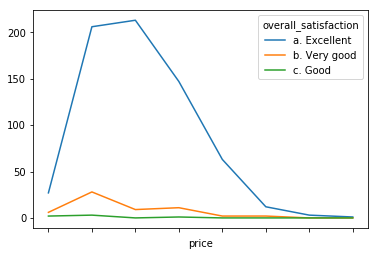

In [29]:
table = pd.crosstab(index=[df['price']], columns=df['overall_satisfaction'])
table.plot()

In [30]:
table = pd.crosstab(index=[df['price'], df['room_type']], columns=df['overall_satisfaction'])
table

overall_satisfaction        a. Excellent  b. Very good  c. Good
price      room_type                                           
a. 0-25    Private room               16             2        1
           Shared room                11             4        1
b. 26-50   Entire home/apt            31             4        0
           Private room              165            21        3
           Shared room                10             3        0
c. 51-75   Entire home/apt           123             7        0
           Private room               89             2        0
           Shared room                 1             0        0
d. 76-100  Entire home/apt           119             8        0
           Private room               27             3        0
           Shared room                 1             0        1
e. 101-150 Entire home/apt            55             2        0
           Private room                8             0        0
f. 151-200 Entire home/apt            10             2        0
           Private room                2             0        0
g. 201-300 Entire home/apt             2             0        0
           Private room                1             0        0
h. 301-750 Entire home/apt             1             0        0

In [31]:
freq = pd.crosstab(index=[df['price']], columns=df['overall_satisfaction'])
freq

overall_satisfaction,a. Excellent,b. Very good,c. Good
price,,,
a. 0-25,27,6,2
b. 26-50,206,28,3
c. 51-75,213,9,0
d. 76-100,147,11,1
e. 101-150,63,2,0
f. 151-200,12,2,0
g. 201-300,3,0,0
h. 301-750,1,0,0


In [32]:
import scipy.stats as stats

In [33]:
chi_stats = stats.chi2_contingency(freq)
print ('Test t=%f p-value=%f' % (chi_stats[0], chi_stats[1]))
chi_stats

Test t=31.292372 p-value=0.005044


(31.292372311670498,
 0.0050438762943267714,
 14L,
 array([[  3.19565217e+01,   2.75815217e+00,   2.85326087e-01],
        [  2.16391304e+02,   1.86766304e+01,   1.93206522e+00],
        [  2.02695652e+02,   1.74945652e+01,   1.80978261e+00],
        [  1.45173913e+02,   1.25298913e+01,   1.29619565e+00],
        [  5.93478261e+01,   5.12228261e+00,   5.29891304e-01],
        [  1.27826087e+01,   1.10326087e+00,   1.14130435e-01],
        [  2.73913043e+00,   2.36413043e-01,   2.44565217e-02],
        [  9.13043478e-01,   7.88043478e-02,   8.15217391e-03]]))

In [34]:
alpha = 0.05

In [35]:
critical_value = crit = stats.chi2.ppf(q = 1 - alpha, # Find the critical value for 95% confidence*
                      df = chi_stats[2]) #degree of freedom
critical_value

23.68479130484058

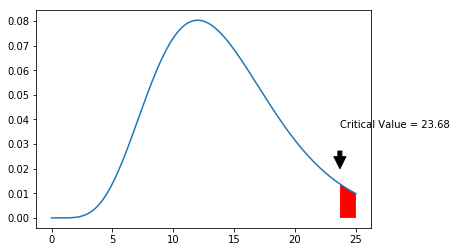

In [36]:
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))
plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
            arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )
plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

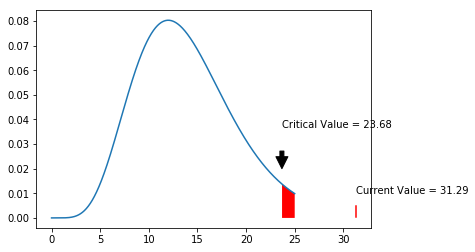

In [37]:
x = np.linspace(0, 25, 1000)  # set range for x-axis
plt.plot(x, stats.chi2.pdf(x, chi_stats[2]))  # plot chi2 distribution with given degrees of freedom

plt.axvline(x=critical_value, ymin=0.05,ymax=0.05, c='r')
plt.axvline(x=chi_stats[0], ymin=0.05,ymax=0.1, c='r')

plt.annotate('Current Value = {0:.2f}'.format(chi_stats[0]), xy=(chi_stats[0], 0.02), xytext=(chi_stats[0], 0.01))

plt.annotate('Critical Value = {0:.2f}'.format(critical_value), xy=(critical_value, 0.02), xytext=(critical_value, 0.04), 
        arrowprops=dict(facecolor='black', shrink=0.5), verticalalignment='top' )

plt.fill_between(x, stats.chi2.pdf(x, chi_stats[2]), where= x > critical_value, facecolor='red', interpolate=True)

In [38]:
observed_chi_val = chi_stats[0]
#if observed chi-square < critical chi-square, then variables are not related
#if observed chi-square > critical chi-square, then variables are not independent (and hence may be related).
observed_chi_val

31.292372311670498

In [39]:
if observed_chi_val <= critical_value:
    # observed value is not in critical area therefore we accept null hypothesis
    print ('Null hypothesis cannot be rejected')
else:
    # observed value is in critical area therefore we reject null hypothesis
    print ('reject null hypothesis')

reject null hypothesis
